# BERT Base -  Augmented Data - Filtered Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [ ]:
dataset

,Text,Emotion
0,Welcome to the NFC Payoffs -Life long Vikings ...,joy
1,football is my best cope. its like chess to me,joy
2,im feeling generous ahahahaha im so morbidly f...,joy
3,Damn... that’s another thing I didn’t even thi...,disgust
4,Omg I love it,joy
...,...,...
75013,i hope all of you epers feel terrific too,joy
75014,"Claims to be ""against sexist [NAME] bros"" Hire...",anger
75015,i was feeling pretty gloomy when i started wri...,sadness
75016,i feel that so many might be far too eager to ...,joy


In [ ]:
dataset['Emotion'].value_counts()

joy         14744
sadness     14168
fear        13037
anger       12987
surprise    11611
disgust      8471
Name: Emotion, dtype: int64

In [ ]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [ ]:
dataset

,Text,Emotion
0,Welcome to the NFC Payoffs -Life long Vikings ...,2
1,football is my best cope. its like chess to me,2
2,im feeling generous ahahahaha im so morbidly f...,2
3,Damn... that’s another thing I didn’t even thi...,3
4,Omg I love it,2
...,...,...
75013,i hope all of you epers feel terrific too,2
75014,"Claims to be ""against sexist [NAME] bros"" Hire...",0
75015,i was feeling pretty gloomy when i started wri...,4
75016,i feel that so many might be far too eager to ...,2


In [ ]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [ ]:
training_data

,Text,Emotion
0,Fucking and being a boy,0
1,i feel like this semester has been good for me,2
2,And how she can’t cry bc of her “expensive las...,4
3,I was getting arrested and my dog run away fro...,4
4,That's your guess as to why people don't want ...,3
...,...,...
60009,Just the ones who jump on my car. So far that'...,0
60010,i feel like im actually supporting myself by m...,2
60011,Oh [NAME] this is horrible,1
60012,"I felt a great disturbance in the Force, as if...",1


In [ ]:
training_data['Emotion'].value_counts()

2    11861
4    11262
1    10463
0    10386
5     9302
3     6740
Name: Emotion, dtype: int64

In [ ]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [ ]:
validation_data

,Text,Emotion
0,That was straight up reckless,3
1,"What a fucking idiotic thing to say. Fuck you,...",0
2,i feel arsenal could be clearly superior,2
3,ugh their mind,3
4,There are more disgusting places in the world ...,3
...,...,...
7497,Just imagine being scared of a black bear,1
7498,I don’t buy it!,0
7499,"That's some creepy coincidence, then! Maybe I'...",5
7500,FUCK YESSSSS CJJJJJJJJ,0


In [ ]:
validation_data['Emotion'].value_counts()

4    1451
2    1433
0    1318
1    1283
5    1150
3     867
Name: Emotion, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data

,Text,Emotion
0,Ooh you made them?! Awesome!! I hope you enjoy...,2
1,"This isn't about football, [NAME] is a horribl...",0
2,Ask him for as much help as you need though. O...,5
3,i can feel the cold of winter,0
4,i am going crazy at leas the feeling is more p...,1
...,...,...
7497,i am now and i still feel the aching lonelines...,4
7498,Yes. One of her fingers is getting a sore on i...,1
7499,i am feeling very defeated,4
7500,You were used as a weapon to inflict pain on y...,2


In [ ]:
test_data['Emotion'].value_counts()

4    1455
2    1450
1    1291
0    1283
5    1159
3     864
Name: Emotion, dtype: int64

# Model 

In [ ]:
training_data.shape, test_data.shape, validation_data.shape

((60014, 2), (7502, 2), (7502, 2))

In [ ]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 39.3 MB/s 
     |████████████████████████████████| 880 kB 75.9 MB/s 
     |████████████████████████████████| 182 kB 81.4 MB/s 
     |████████████████████████████████| 6.6 MB 80.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=fa8d7078683a46dae3f6fc107e4374d8a06787c031cb7aaf26d702fd12d0695f
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'bert-base-cased'

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: *Fuck extremists.
BERT Tokenizer: ['*', 'Fuck', 'ex', '##tre', '##mist', '##s', '.']


In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 100,               # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Simply amazing.
Tokenizer	: ['[CLS]', 'Si', '##mp', '##ly', 'amazing', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [101, 14159, 8223, 1193, 6929, 119, 102, 0, 0, 0, 0, 0,

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

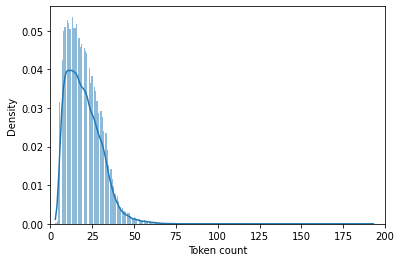

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 100

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 1.4 MB 33.7 MB/s 
     |████████████████████████████████| 5.8 MB 67.6 MB/s 
     |████████████████████████████████| 462 kB 88.3 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Fine Tuning

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 16
LEARNING_RATE = 5e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
3751/3751 [==============================] - 1303s 342ms/step - loss: 0.6719 - accuracy: 0.7711 - val_loss: 0.5737 - val_accuracy: 0.8002
Epoch 2/5
3751/3751 [==============================] - 1286s 343ms/step - loss: 0.5086 - accuracy: 0.8260 - val_loss: 0.5747 - val_accuracy: 0.7989
Epoch 3/5
3751/3751 [==============================] - 1285s 343ms/step - loss: 0.4162 - accuracy: 0.8580 - val_loss: 0.6428 - val_accuracy: 0.7954
Epoch 4/5
3751/3751 [==============================] - 1284s 342ms/step - loss: 0.3491 - accuracy: 0.8791 - val_loss: 0.7198 - val_accuracy: 0.7847
Epoch 5/5
3751/3751 [==============================] - 1284s 342ms/step - loss: 0.3044 - accuracy: 0.8930 - val_loss: 0.7377 - val_accuracy: 0.7887
CPU times: user 1h 17min 37s, sys: 13min 10s, total: 1h 30min 47s
Wall time: 1h 48min 18s


# Evaluation

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

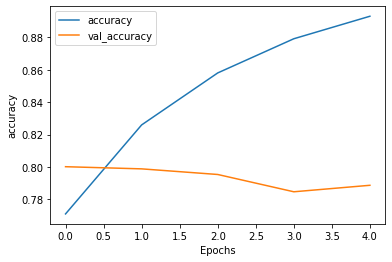

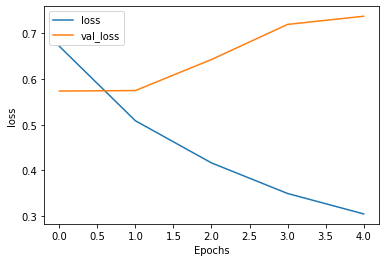

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.771070 	   0.671930 	   0.800187 	   0.573725
       2   0.825957 	   0.508561 	   0.798854 	   0.574735
       3   0.858016 	   0.416185 	   0.795388 	   0.642830
       4   0.879095 	   0.349147 	   0.784724 	   0.719758
       5   0.892975 	   0.304351 	   0.788723 	   0.737694


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

469/469 [==============================] - 54s 115ms/step - loss: 0.7340 - accuracy: 0.7907
Test Accuracy: 0.7907224893569946


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.7907224740069315

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 954,   51,   30,   94,   97,   57],
       [  26, 1157,   16,   26,   49,   17],
       [  56,   20, 1253,   19,   37,   65],
       [ 171,   65,   20,  498,   71,   39],
       [  73,   63,   41,   50, 1200,   28],
       [  58,   78,   67,   46,   40,  870]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1283
           1       0.81      0.90      0.85      1291
           2       0.88      0.86      0.87      1450
           3       0.68      0.58      0.62       864
           4       0.80      0.82      0.81      1455
           5       0.81      0.75      0.78      1159

    accuracy                           0.79      7502
   macro avg       0.78      0.78      0.78      7502
weighted avg       0.79      0.79      0.79      7502

